# CCTV 과제

## 설정

In [4]:
# Jupyter Notebook 설정 : 모든 결과 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
# DeprecationWarning / FutureWarning(차후 버전에서 없어질 기능이니 미리 경고하는 것) 끄기
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
# matplotlib에서 한글 사용 설정
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform

mpl.rcParams['axes.unicode_minus'] = False

system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin": # Mac OS
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")

In [7]:
# plt.show() 동작 방법 변경 설정 (window >> jupyter notebook)
%matplotlib inline

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json

## 준비

In [63]:
df = pd.read_csv("cctv_result.csv", encoding='utf-8', index_col="구별")
print(type(df.columns), len(df.columns))
print(type(df.index), len(df.index))
df.head()

<class 'pandas.core.indexes.base.Index'> 9
<class 'pandas.core.indexes.base.Index'> 25


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


In [64]:
json_file = '../study_python/folium/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(json_file, encoding='utf-8'))
#geo_str

## 결과

### 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율을 구해 순위 비교

In [65]:
column_name = "소계"
df.sort_values(by=column_name, ascending=False).head()
map = folium.Map(location=[37.5502,126.982], zoom_start=11, tiles='OpenStreetMap')
folium.Choropleth(geo_data=geo_str, data=df, columns=[df.index,column_name], 
    key_on='feature.id', fill_color='PuRd', legend_name='CCTV 현황').add_to(map)
folium.LayerControl().add_to(map)
map

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107
서초구,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.510093
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321
은평구,2108,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.426386


In [86]:
# df["CCTV비율"] = 100 * df["소계"] / df["인구수"]
column_name = "CCTV비율"
df.sort_values(by=column_name, ascending=False).head()
map = folium.Map(location=[37.5502,126.982], zoom_start=11, tiles='OpenStreetMap')
folium.Choropleth(geo_data=geo_str, data=df, columns=[df.index,column_name], 
    key_on='feature.id', fill_color='PuRd', legend_name='CCTV 현황').add_to(map)
folium.LayerControl().add_to(map)
map

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,0.994350
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302
중구,1023,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,0.767787
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458


### 인구대비 cctv의 평균치를 확인하고 cctv가 과하게 부족한 구를 확인

인구대비 cctv의 평균 : 0.4122256405579131


<BarContainer object of 14 artists>

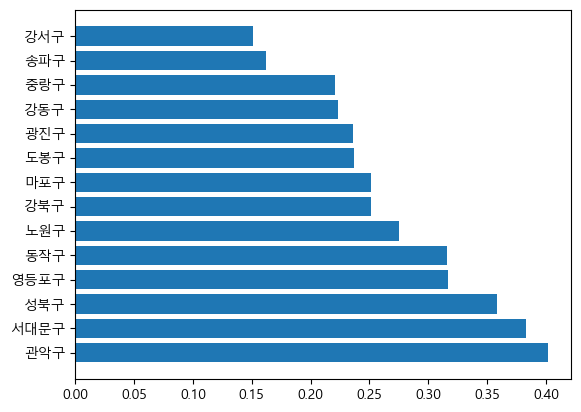

In [72]:
cctv_mean = df['CCTV비율'].mean()
print("인구대비 cctv의 평균 :", cctv_mean)
shortage_df = df[df['CCTV비율'] < cctv_mean].sort_values(by='CCTV비율', ascending=False)
plt.barh(shortage_df.index, shortage_df['CCTV비율'])
plt.show()

### 고령자 대비 cctv 비율

<BarContainer object of 25 artists>

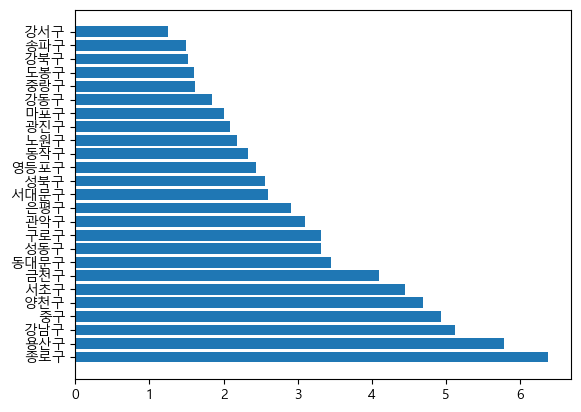

In [85]:
column_name = "고령자"
df1 = df[["소계",column_name]][:]
df1["CCTV_RATIO"] = 100 * df1["소계"] / df1[column_name]
df2 = df1.sort_values(by="CCTV_RATIO", ascending=False)
plt.barh(df2.index, df2["CCTV_RATIO"])
plt.show()

### 외국인 대비 cctv 비율

<BarContainer object of 25 artists>

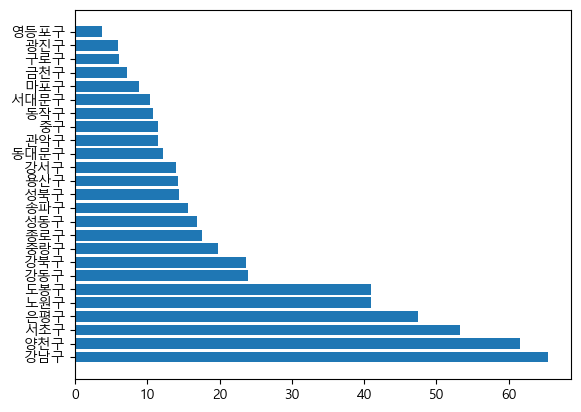

In [84]:
column_name = "외국인"
df1 = df[["소계",column_name]][:]
df1["CCTV_RATIO"] = 100 * df1["소계"] / df1[column_name]
df2 = df1.sort_values(by="CCTV_RATIO", ascending=False)
plt.barh(df2.index, df2["CCTV_RATIO"])
plt.show()

# END